<a href="https://colab.research.google.com/github/R-Madhuram/Marketing-Campaign-Analysis/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



**NOTE**: The notebook is more comprehensible in google colab which can display the table of contents. However the notebook also contains a general road map of the analysis conducted to better navigate to the required sections.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Road-map of the notebook 
(for Project organization and navigation, the Jupyter notebook has been constructed with headings and text appropriately formatted where the 'sections' indicate the headings of the notebook --> as shown in table of contents in colab)
1. Load the data 

(section: Problem1 and problem 2)
2. EDA of the data 

(section: Problem 3, Rubric addressed: a. Visualizations
- Appropriate plots for categorical and continuous variables are utilized
- Plots contain human readable labels
- Plots contain descriptive titles
Axes are legible
-Subplots are used when appropriate
-Plots are scaled appropriately for readability.   
b.Findings
-Correct and concise interpretation of descriptive and inferential statistics)
3. Business understanding of the problem: Classification of customers as who accept vs reject a marketing campaign telecall. 

(section: Problem 4, Rubric addressed:- Findings
- Clearly stated business understanding of problem)
4. Feature Engineering: Building subdataframes to evaluate which models to select for analysis with scaled up data. Also contains helper functions for most processes that require repetition. 

(section: Problem 5, Rubric addressed:-a. Findings
- Clean and organized notebook with data cleaning       
b. Syntax and Code Quality
- Libraries are imported and aliased correctly
- Code does not contain errors
- No long strings of code output
- Demonstrates competency with pandas
- Demonstrates competency with seaborn
- Comments are used appropriately to explain code
- Variables are sensible)
5. Building a baseline model with small dataframe 

(section: Problem 6 and Problem 7, Rubric addressed:a. Findings-
Correct and concise interpretation of descriptive and inferential statistics)
6. Model Building/prediction/comparision: We build and evaluate 4 classification models (KNN, Logistic regression, Decesion Tree, Suppport vector machines)
using F1 score and ROC-AUC, and running time.

(section: Problem 8, Problem 9 and Problem 10, Rubric addressed: a. Modeling
- Use of four classifier models (kNN, Decision Trees, Logistic Regression, and SVM)
-Clear identification of evaluation metrics
- Appropriate interpretation of evaluation metrics
- Clear rationale for use of the evaluation metrics
- Appropriate comparison of the four models
7. Model Improvement: We take the best model from the above steps, logistic regression and decision tree to build and evaluate them on complete dataframe with and without removing the unknowns. 

(section: Problem 12 and Problem 13, Rubric addressed: a. Modeling
- Use of four classifier models (kNN, Decision Trees, Logistic Regression, and SVM)
- Clear identification of evaluation metrics
- Appropriate interpretation of evaluation metrics
- Clear rationale for use of the evaluation metrics
- Appropriate comparison of the four models.
8. Results: Logistic regression and decision tree with complete data (without removing unknown) preform the best. Decision tree takes fraction of time of logistic regression. 

(section: Problem 14, Rubric Addressed: a. Finding
- Clearly stated findings in their own section with actionable items highlighted in appropriate language for a non-technical audience)
9. Future recommendation: 

(section: Problem 15, Rubric Addressed:  a. Finding
- Next steps and recommendations)

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### Answer 1: ####
The dataset presented in this problem through UCI Machine Learning repository https://archive.ics.uci.edu/ml/datasets/bank+marketing is closely related to the data from a portuguese bank that conducted 17 directed marketing campaigns. These campaigns occured between May 2008 and November 2010 with a total of 79354 contacts (1).



### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd
import time

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PAC-3/data/bank-additional-full.csv', sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print('Table 1')
df.describe()

Table 1


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Basic Statistical analysis ####

- The given dataset does not have any null features. 
- Furthermore, this dataset has been distilled from the original dataset with more than 150 features and is closely resembles the feature extracted data used by *Moro et.al.* for modelling the campaigning outcome (2). 
- The proposed generic social and economic indicators were and are to be used for modelling telemarketing campaign success.
- We have 10 numerical features and 10 categorical features that are to be utilized as predictors for the the marketing campaign outcome which is a binary feature depending on whther the marketing was able to make a contact or not with the customer.
- On performing basic statistical analysis on the data, we find that the mean age of the customers contacted during the campaigns to be 40 years, with about mean of 4 mins of contact/talk time. 
- We also find that each customer is contacted 2-3 times on average for each campaign and many of them are new customers (i.e customers contacted in previous campaign were not contacted again).
- The preliminary statistical analysis on the client's social and economic status also indicates that customers who were contacted had low quarterly employement variation rate and worked in organizations with a mean of ~ 5000 employees. 

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Text(0.5, 1.1, 'Figure - 1: Box plot of numerical variables')

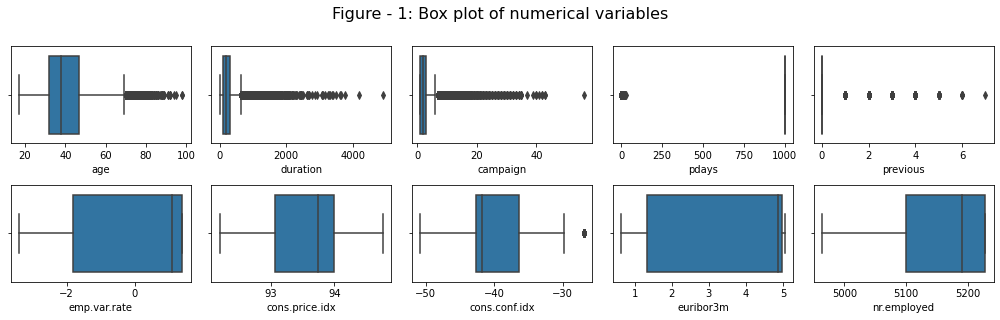

In [ ]:
# Box-Plots of the numerical features to examine the outliers
import seaborn as sns
import matplotlib.pyplot as plt

num_column_lst = []
for icol in df.columns:
  if df[icol].dtypes in ['float64', 'int64']:
    num_column_lst.append(icol)
print(num_column_lst)

fig, axs = plt.subplots(nrows = 2, ncols=5, figsize = (14,4))
for name,ax in zip(num_column_lst,axs.flatten()):
  sns.boxplot(data=df,x=name,ax=ax)
  # plt.show()
fig.tight_layout()
fig.suptitle('Figure - 1: Box plot of numerical variables',y=1.1,fontsize=16)


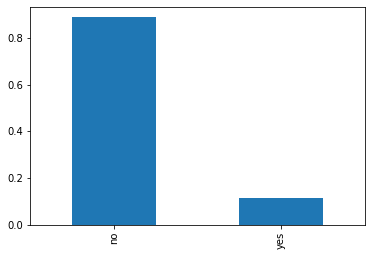

In [ ]:
df['y'].value_counts(normalize=True).plot(kind='bar')

#### Outlier Detection ####


From the boxplots of numerical features we find that 
1. 'duration' of the telemarketing cal and 
2. number of contacts made for a particular client during one particular 'campaign' 
have significant outliers. 

This finding is further emphasised by the observation that the 75th percentile of both the features are much lower than the maximum observation in both the features as presented in table 1. 

Further analysis of the features with the response variable might be able to explain the presence of such outliers. Such analysis could also help us to decide whether to remove the outliers or not for any model building. It is also to be noted that the 'duration' affects the response variable significantly although there is no way to have hard control on the call conversation timing. 

Text(0.5, 1.02, 'Figure-2: Distribution plot of numerical variables')

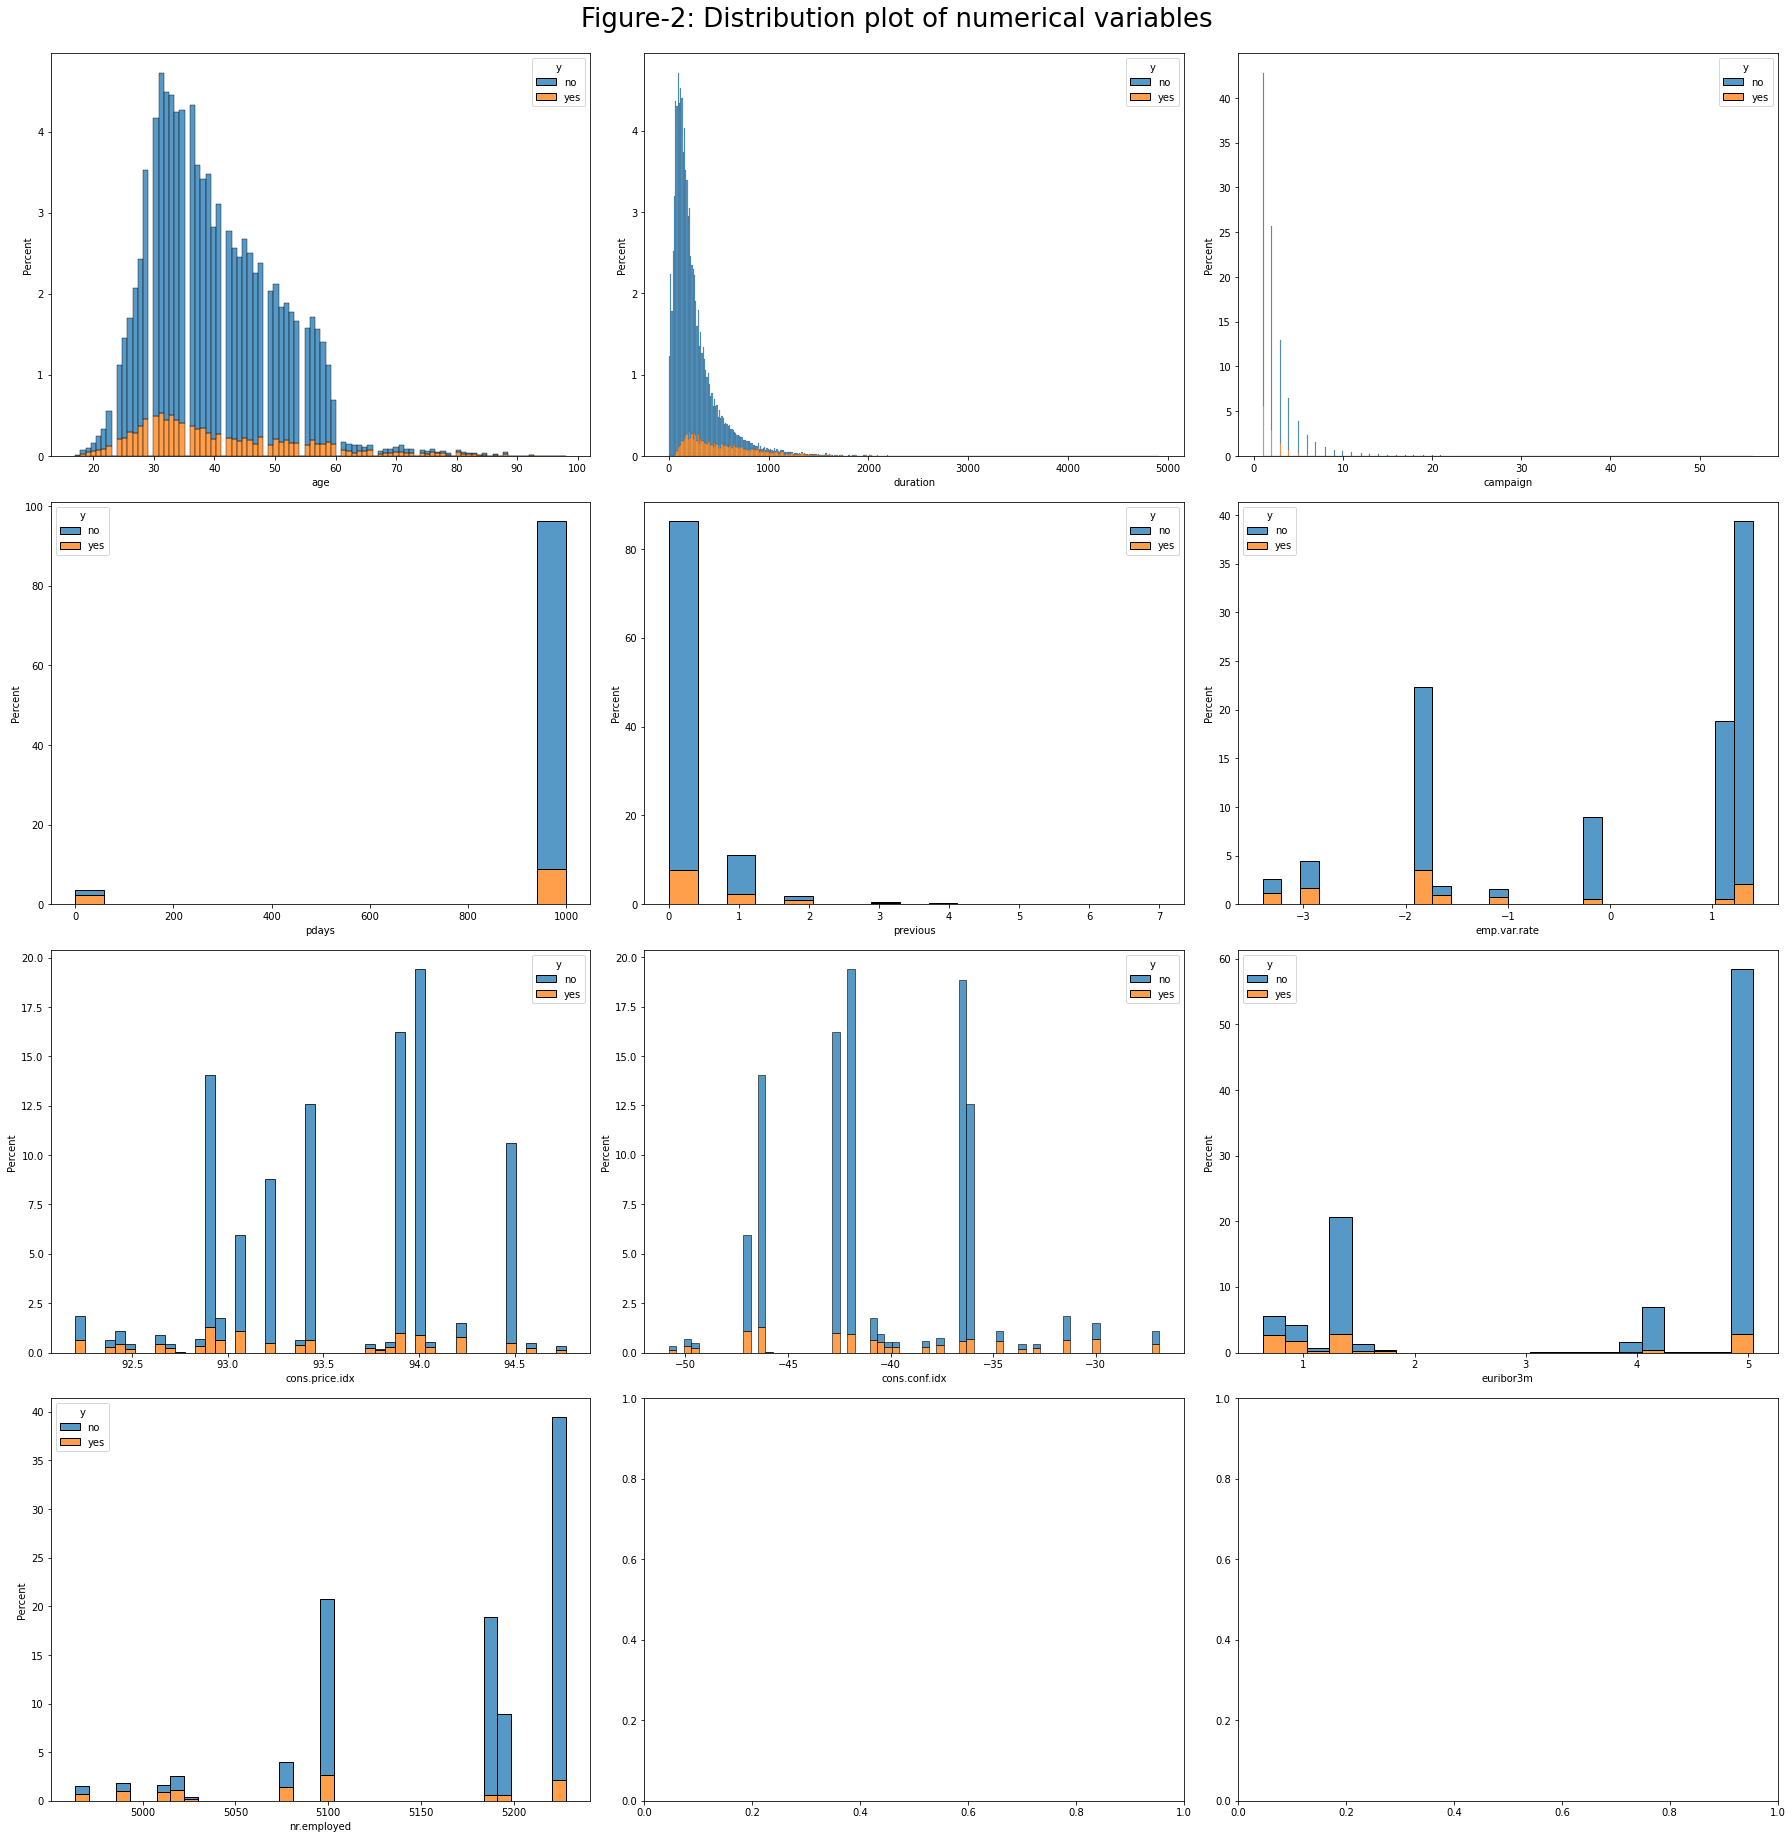

In [ ]:
# Bar-Plots of the Numerical features to examine the distribution of the feature
fig, axs = plt.subplots(nrows = 4, ncols=3, figsize = (25,25))
for name,ax in zip(num_column_lst,axs.flatten()):
  sns.histplot(data=df,x=name,ax=ax,hue='y',multiple='stack',stat='percent')
  #ax.set_xticklabels(ax.get_xticklabels(minor=True,which='minor'),rotation=0,fontsize=15)
  
fig.tight_layout()
fig.suptitle('Figure-2: Distribution plot of numerical variables',y=1.02,fontsize=26)





['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Text(0.5, 1.02, 'Figure-3: Bar-plot of Categorical variables')

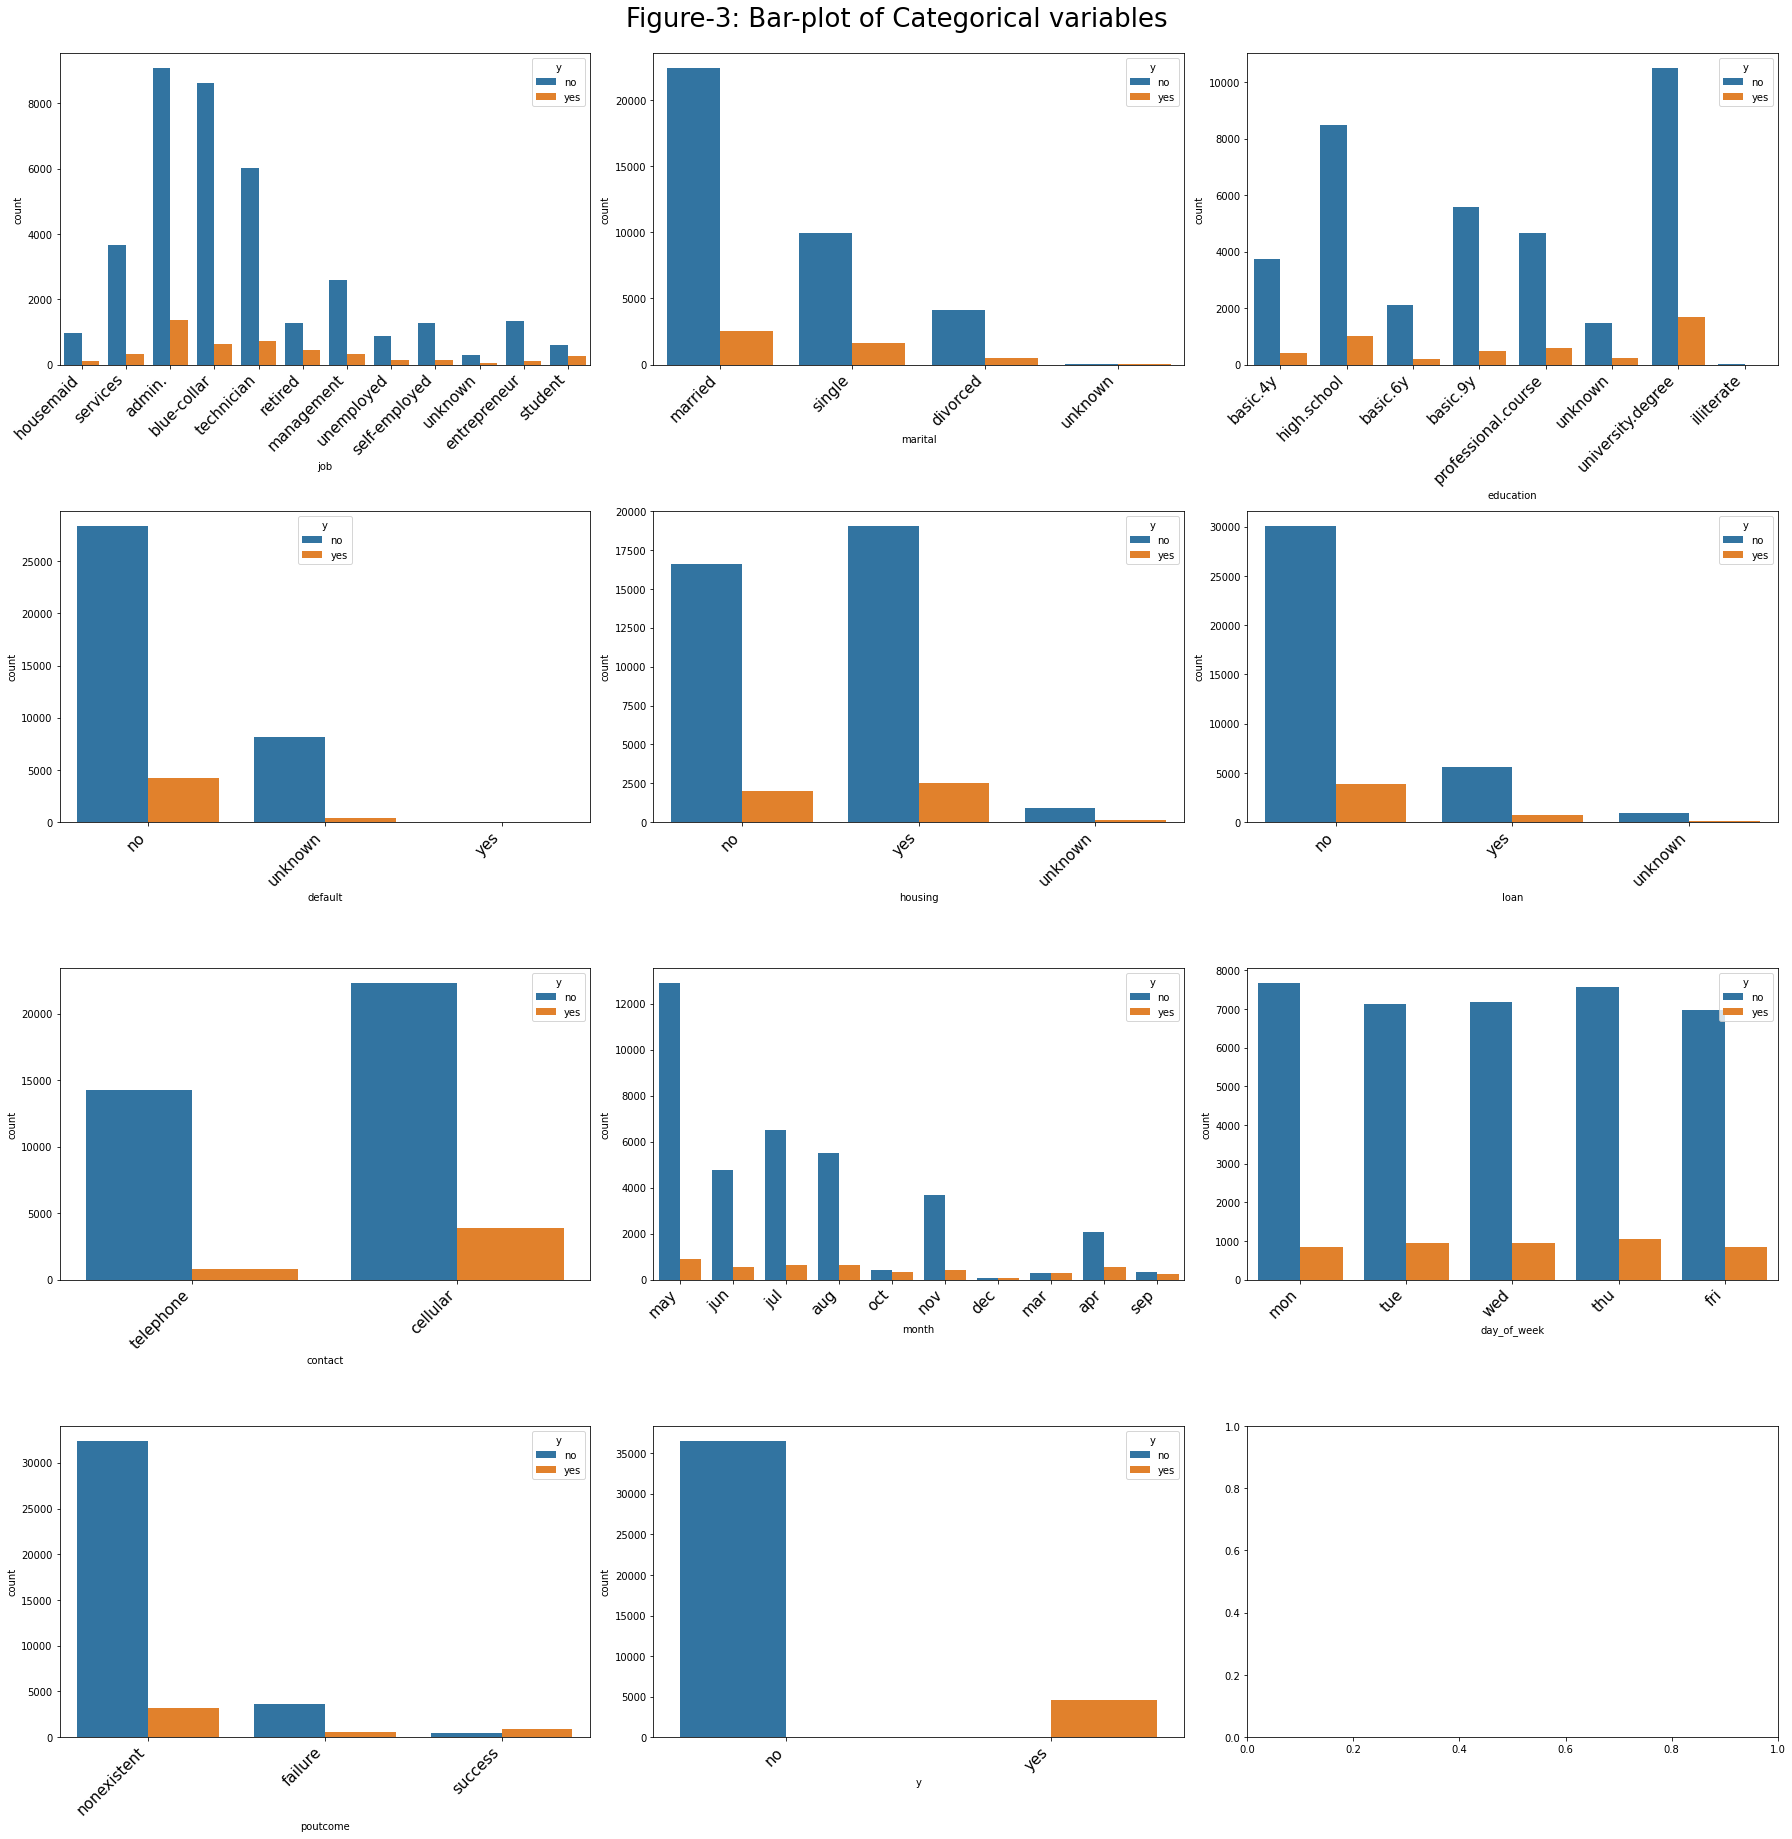

In [ ]:
# Bar-Plots of the categorical features to examine the distribution of the various categories in a feature
cat_column_lst = []
for icol in df.columns:
  if df[icol].dtypes in ['object']:
    cat_column_lst.append(icol)
print(cat_column_lst)

fig, axs = plt.subplots(nrows = 4, ncols=3, figsize = (25,25))
for name,ax in zip(cat_column_lst,axs.flatten()):
  sns.countplot(data=df,x=name,ax=ax,hue='y')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=15)
  
fig.tight_layout()
fig.suptitle('Figure-3: Bar-plot of Categorical variables',y=1.02,fontsize=26)


#### Distribution of the response variable within each feature #### 

We find that the dataset is imbalanced with only about ~12% of the marketing campaign observations accepted the offer.
From the bar-plots of all the features representing the response variable (Figure-2,Figure-3) we find that, for features with significant outliers ('duration' and 'campaign') the response variable distribution is skewed to the right. This is explainable based on the fact that a contact needs to be made in order for the customer to accept a marketing offer as represented by the bar-chart of 'campaign'(Figure-2). However, as the number of contacts increases byond 7, there is no change in the proportion of customers acceting the offer to rejecting the offer. This might have business implication in marketing traget contact frequency as well as in model building for predictions. 

Once the contact is made 'duration' of the conversation as found in earlier reserach (2) is an important predictor of marketing success. We find that the proportion of people accepting the offer does not increase significantly as we increase the conversation time till ~300 secs. However that proportion increases rapidly with increasing conversation from ~400 secs time till ~5000 sec (table-1). This could be explained by the fact that the customers who are willing to accept the offer are being enrolled, enquiring about the program thus making the percent of success to be about 100% from 1300 secs onwards. This could have serious implication in model building as we may not be able to produce real-world prediction, but only make a general suggestion regarding the call duration cut-off time once the customer engages. Similar approach to modelling for predictions is also highlighted in previous research (2). 

From figure-3 we find that the features 'default', 'housing', 'loan' have significant unlnown values while 'marriage' has few unknown observations. We also observe that there is almost no observation with credit default and higher percent of marketing campaign acceptance rate with people who have a personal loan (although there has been lesser contacts with that population). This situation is reversed for population that has a housing loan where people with/without a housing loan have similar acceptance rate for the offer.However the data we have for customers with personal loan is imbalance with nearly~30% of the observation alone having a personal loan.

These insights could be utilized for better consumer targeting in the upcoming campaigns that could decrease the imbalances within the categories for better prediction. Similar variations in the number of consumers reached to is found in 'month' feature as well where it is observed that the number of success does not vary significantly across months inspite of total custaomers contacted differs. An evenly distributed campaign across months similar ot 'day_of_week' feature could provide more insight on customer response and hence better performing predictive models. 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Business Objective ####

The business objective of this study is to predict the success of marketing campaign through telemarketing calls for selling bank long-term deposits. We propose to analyse the curated data from a previous study (2) through various classification models: K-nearest neighbours (KNN), logistic regression (LR), decision trees (DT), support vector machines (SVM),  and neural networks (NN). 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, 

- We must work to write function(s) for the processes that we would repeatedly do throughout our analysis. 

- Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations to find which models and metrics could be utilized for complete analysis and improvization(s).

#### Helper functions ####

In [ ]:
# Computing model metrics (accuracy, F1 score, Precision, recall, Area under the receiver operator curve)

def computeModelMetrics(y_pred,y_pred_prob,y):
  """first import the required libraries for this function to work:
      1. from sklearn.metrics import auc,RocCurveDisplay,PrecisionRecallDisplay
      2. from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
      3. from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve 
  input: Takes in 3 parameters or 2 parameters where proablity is not available.
  y_pred: Predicted value of y from the model
  y_pred_prob: Probablity of that predicted value of y (where available)
  y : true values of y
  output:
  acc-> accuracy, f1-> f1 score, prec-> Precision, rec-> recall, 
  rocauc-> area under the receiver operator cure"""
  acc = accuracy_score(y_pred,y)
  f1 = f1_score(y,y_pred)
  prec = precision_score(y,y_pred)
  rec = recall_score(y,y_pred)
  rocauc = roc_auc_score(y,y_pred_prob)

  return acc,f1,prec,rec,rocauc

In [ ]:
# creating dataframe of all the model metrics

def createMetricsDF(train_acc,train_f1,train_prec,train_rec,train_rocauc,
                    dev_acc,dev_f1,dev_prec,dev_rec,dev_rocauc):
  """first import the required libraries for this function to work:
      1. from sklearn.metrics import auc,RocCurveDisplay,PrecisionRecallDisplay
      2. from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
      3. from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve 
  Since our model evaluate two datasets, 1. training dataset, 2. development dataset,
  we have 5 evaluation metrics (accuracy,precision, recall, area under receiver-operator curve)
  for both the datasets.
  output:
  dataframe containing all the classification metrics for the respective dataset as a row/observation."""
  metrics = {'Dataset Type':['training','development'],
                    'accuracy':[train_acc,dev_acc],
                    'f1 score':[train_f1,dev_f1],
                    'precision':[train_prec,dev_prec],
                    'recall':[train_rec,dev_rec],
                    'roc auc score':[train_rocauc,dev_rocauc]}

  metrics_df = pd.DataFrame.from_dict(metrics)
  return metrics_df

In [ ]:
# define a thresh that takes in as parameters the predicted probabilities, the y_test and a threshold
# to compute the precision, recall, accuracy,  f1-score for a given threshold of probability

def model_metric_thresh(predict_probs, 
                  y_test, 
                  thresh):
  """ first import the required libraries for this function to work:
      1. from sklearn.metrics import auc,RocCurveDisplay,PrecisionRecallDisplay
      2. from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
      3. from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
      input parameters: 1. probablity of predicted values from the model,
                        2. true value of y
                        3. list of threshols as an np array
      calulates predicted values of y using the threshold and probablity
      output: 1. Precision
              2. recall
              3. accuracy
              4. f1 score
  """
  preds = np.where(predict_probs >= thresh, True, False)
  return precision_score(y_test, preds, pos_label=True),recall_score(y_test, preds, pos_label=True),\
  accuracy_score(y_test, preds),f1_score(y_test, preds)

In [ ]:
# Logistic regression

""" We build a helper function for logistic regression since our analysis uses this model for baseline
and for further analysis also repeatedly"""

from sklearn.linear_model import LogisticRegression

def buildLogisticRegression(X_train,y_train,X_dev,y_dev,classWeightsBalance):

  """ input:1. Train data (X_train and y_train)
          2. Test data (X_dev and y_dev)
          3. ClassweightsBalance (bool: true/False)--> If data is balaced we can set to false else
  It can be set to true for cosidering the imbalance in the dataset while building the model
  Calculates the time taken to train anf fit the model, probablities of observation and the predicted class
  for train data, probablities of observations and the predicted class for test data.
    Output: 1. Probablity and class predicted for each observation in training data
            2. Probablity and class predicted for each observation in test/developmet data
            3. Run time for the training and fitting of the model"""
 

  if classWeightsBalance:
    start=time.time()
    LR = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
    stop = time.time()
  else:
    start = time.time()
    LR = LogisticRegression().fit(X_train, y_train)
    stop = time.time()

  LR_train_probs = LR.predict_proba(X_train)[:,1]
  LR_train_pred = LR.predict(X_train)

  LR_dev_probs = LR.predict_proba(X_dev)[:,1]
  LR_dev_pred = LR.predict(X_dev)

  fit_time = str(round(stop-start,2))+'s'

  print(LR_dev_probs.shape)
  print(y_dev.shape)
  print(X_dev.shape)
  print(np.round(LR_dev_probs))
              
  return LR_train_probs,LR_train_pred,LR_dev_probs,LR_dev_pred,fit_time

In [ ]:
# Creating plots for various classification models 

""" we create this function to be called upon by various models (especially the classification models that 
output a probablity) to plot ROC-Curve and visualising precision-recall curve """

def computeAndPlotMetrics(train_pred,train_probs,dev_pred,dev_probs,
                                  y_dev,y_train,thresholds,modelType):
  
  """ first import the required libraries for this function to work:
      1. from sklearn.metrics import auc,RocCurveDisplay,PrecisionRecallDisplay
      2. from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
      3. from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
      input: 1. target variable of training set (y_train), training set predictions (train_pred),
                training set probablitites (train_probs)
             2. target column of test/dev set (y_dev), development set predictions (dev_pred),
                develpment set probablitites (dev_probs)
             3. thresholds as np array
             4. classification model used
      output: 1. ROC-AUC curve plot for training and development data
              2. Preceision-recall curve for training and develpment data
              3. Plot of various metric values for different thresholds
              4. Dataframe of various evaluation metrics for both training and develpment data sets
  """

  train_acc, train_f1, train_prec, train_rec, train_rocauc =\
  computeModelMetrics(train_pred, train_probs, y_train)

  dev_acc, dev_f1, dev_prec, dev_rec, dev_rocauc = \
  computeModelMetrics(dev_pred, dev_probs, y_dev)

  metrics_df = createMetricsDF(train_acc,train_f1,
                                          train_prec,train_rec,train_rocauc,
                                          dev_acc,dev_f1,
                                          dev_prec,dev_rec,dev_rocauc)
  # print(metrics_df)

  display = RocCurveDisplay.from_predictions(y_train,train_probs)
  plt.plot(np.array([0, 1]), np.array([0, 1]))
  plt.title('Train ROC AUC Curve -  ' + modelType + ' Curve')

  display = RocCurveDisplay.from_predictions(y_dev,dev_probs)
  plt.plot(np.array([0, 1]), np.array([0, 1]))
  plt.title('Dev ROC AUC Curve -  '+ modelType + ' Curve')

  precision, recall, boundaries = precision_recall_curve(y_dev, dev_probs, pos_label=True)
  plt.figure()
  plt.plot(precision, recall)
  plt.ylabel('Recall')
  plt.xlabel('Precision')
  plt.title('Precision vs Recall from sklearn');  

  
  #build a dataframe that stores the precision and recall for different probability thresholds
  results_df = ''
  model_metric_vals = np.array([list(model_metric_thresh(dev_probs, y_dev, i)) for i in thresholds])
  
  results_df = pd.DataFrame({'threshold': thresholds, 
                            'precision': model_metric_vals[:,0],
                             'recall':model_metric_vals[:,1],
                             'accuracy':model_metric_vals[:,2],
                             'f1':model_metric_vals[:,3]})

  ax = results_df.plot(x='threshold',y='precision',style='ro--',label='Precision')
  results_df.plot(ax=ax,x='threshold',y='recall',style='go--',label='Recall')
  results_df.plot(ax=ax,x='threshold',y='accuracy',style='bo--',label='Accuracy')
  results_df.plot(ax=ax,x='threshold',y='f1',style='ko--',label='f1')
  plt.legend()

  return metrics_df


####  Sub-dataframe using bank client data only:

The following are the 7 bank information features provided to us: 

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


In [ ]:
# Extracting the relevant features, target column. 

DF = df[['age','job','marital','education','default','housing','loan','y']]
print(DF.shape)
DF.head(2)

(41188, 8)


,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no


In [ ]:
#label encoding the categorical columns
""" Apart from age all the features in this subdataframe are categorical. 
The features 'job', 'marital', 'education' have 12, 4, and 8 unique categories respectively.
All the categorical features except for the target feature have unknowns. SInce these are personal information
and may vary from subject to subject we choose not to carry out any imputation of the unknown category on 
all the features"""

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

DF.loc[:,'job'] = le.fit_transform(DF['job'])
DF.loc[:,'marital'] = le.fit_transform(DF['marital'])
DF.loc[:,'education'] = le.fit_transform(DF['education'])
DF.loc[:,'default'] = le.fit_transform(DF['default'])
DF.loc[:,'housing'] = le.fit_transform(DF['housing'])
DF.loc[:,'loan'] = le.fit_transform(DF['loan'])
DF.loc[:,'y'] = le.fit_transform(DF['y'])

DF.head(2)


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,age,job,marital,education,default,housing,loan,y
0,56,3,1,0,0,0,0,0
1,57,7,1,3,1,0,0,0


<ipython-input-29-f516cf529eca>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(DF.corr(method='pearson'), dtype=np.bool))


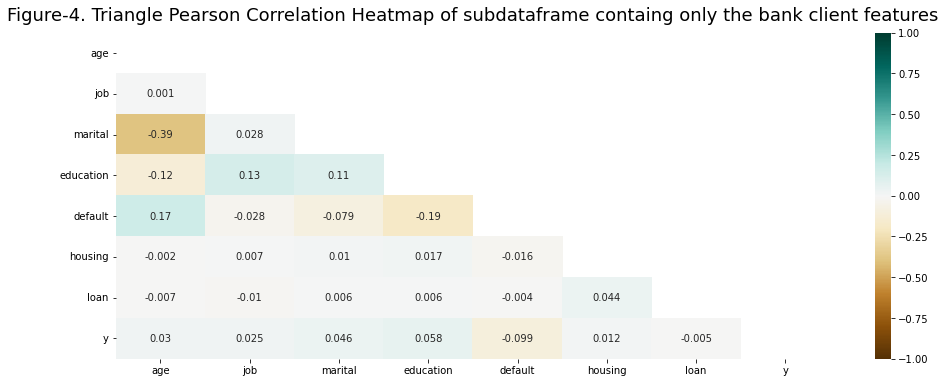

In [ ]:
#finding the interacting features using heatmap
""" This will help us in removing highly correalted features to prevent overfitting"""

import numpy as np

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(DF.corr(method='pearson'), dtype=np.bool))
heatmap = sns.heatmap(round(DF.corr(),3), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Figure-4. Triangle Pearson Correlation Heatmap of subdataframe containg only the bank client features', fontdict={'fontsize':18}, pad=12);
plt.show()

We have conducted a correlation analysis of the data with encoded by plotting the Pearson's correlation coefficient in the traingle heatmap.In Figure-4, we see that there is not a clear linear correlation(coefficient>0.6) between any vaiables. Hence, we need not remove or engineer any more the features and proceed with model building using the subdataframe DF. 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# split the data into training data and develoment data using

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

X = DF.drop(columns = ['y'])
y = DF['y']
        
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [ ]:
X_train.head(1),X_dev.head(1)

(       age  job  marital  education  default  housing  loan
 25611   49    1        1          2        1        0     0,
        age  job  marital  education  default  housing  loan
 14455   32    4        0          6        0        0     0)

In [ ]:
print(y_train.head(1))
print(y_dev.head(1))

25611    0
Name: y, dtype: int64
14455    0
Name: y, dtype: int64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc,RocCurveDisplay,PrecisionRecallDisplay

In [ ]:
y_baseline_train = np.zeros(len(y_train))
y_baseline_dev = np.zeros(len(y_dev))

train_baseline_acc,train_baseline_f1,train_baseline_prec,train_baseline_rec,train_baseline_rocauc = \
computeModelMetrics(y_baseline_train,y_baseline_train,y_train)

dev_baseline_acc,dev_baseline_f1,dev_baseline_prec,dev_baseline_rec,dev_baseline_rocauc = \
computeModelMetrics(y_baseline_dev,y_baseline_dev,y_dev)

baseline_metrics_df = createMetricsDF(train_baseline_acc,train_baseline_f1,
                                      train_baseline_prec,train_baseline_rec,train_baseline_rocauc,
                                      dev_baseline_acc,dev_baseline_f1,
                                      dev_baseline_prec,dev_baseline_rec,dev_baseline_rocauc)
baseline_metrics_df

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.887344,0.0,0.0,0.0,0.5
1,development,0.887351,0.0,0.0,0.0,0.5


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

#### Logistic Regression ####

In [ ]:
# Build logistic regression model without balancing the class weights

LR_simple_train_probs_unbalancedWeights, LR_simple_train_pred_unbalancedWeights, LR_simple_dev_probs_unbalancedWeights,\
LR_simple_dev_pred_unbalancedWeights,LR_fit_time_unbalanced = buildLogisticRegression(X_train,y_train,X_dev,y_dev,False)


(8238,)
(8238,)
(8238, 7)
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# Build logistic regression model with balancing the class weights
LR_simple_train_probs_balancedWeights,LR_simple_train_pred_balancedWeights,LR_simple_dev_probs_balancedWeights,\
LR_simple_dev_pred_balancedWeights,LR_fit_time_balanced = buildLogisticRegression(X_train,y_train,X_dev,y_dev,True)

(8238,)
(8238,)
(8238, 7)
[0. 1. 0. ... 0. 0. 0.]


### Problem 9: Score the Model

What is the accuracy of your model?

Considering that the dataset is heavily imbalanced with a class balance of around 86%-14%, using as accuracy as a model scoring metric is not ideal. Alternate model metrics such as precision/recall/roc auc score/f1 score need to be evaluated. From these metrics based on the marketing campaign goal, the model can be fine tuned for the appropriate metric. Let us look at these metrics now.

Of all the above metrics, ROC-AUC value is most appropriate for this dataset since we are trying to optimize and maximize our positives. In the real world, 100% successful marketing campaign might not be a realistic target nor failure in a marketing campaign is a serious crime. Hence an optimal way to predict the success of a marketing campaign given the profile of the cadidates is an approach we choose to eavaluate the models and this is represented through the F1 score and ROC-AUC curve that combines both precision and recall value. 

Both F1 score and ROC-AUC curve can be obtained for different values of threshold. 

However setting the threshold low, although would predict all the positives (successful marketing campaigns) candidates correctly, it would overestimate the success i.e. some of the cadidates indicates by that model might not be accepting the offer. **[High Recall, Low precision]**

Since high recall leads to low precision, F1 score is a good metric as it combines both the components (recall and precision) without affecting the model performance in real world. 

SImilarly ROC-AUC curve combines the components of recall and precision partially as it along with true positives also takes false positives into account. Hence if we lower a threshold that predicts much more positives than actually is it would lead to lower AUC in ROC-curve. Hence it is good metric to evaluate as it directly connects our business objective to obtain correct predictions about positive candidates (candidates who accept the offer). 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.887344,0.0,0.0,0.0,0.622077
1,development,0.887351,0.0,0.0,0.0,0.616674


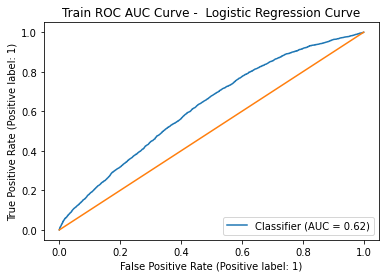

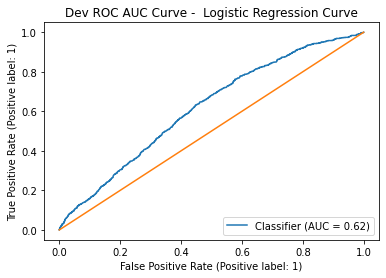

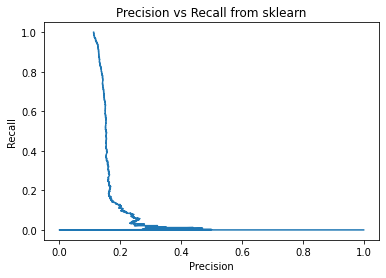

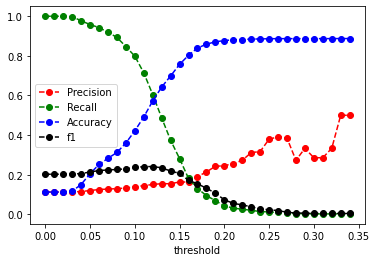

In [ ]:
#plot and get model metrics without balancing class weights
thresholds = np.arange(0, 0.35, .01)
LR_unbalanced_metricsDF = computeAndPlotMetrics(LR_simple_train_pred_unbalancedWeights,LR_simple_train_probs_unbalancedWeights,
                              LR_simple_dev_pred_unbalancedWeights,LR_simple_dev_probs_unbalancedWeights,
                                  y_dev,y_train,thresholds,'Logistic Regression')
LR_unbalanced_metricsDF

The above two plots along with the ROC AUC Score indicate that the ideal threshold of 0.5 for making the predictions would not work in this case. With the threshold of 0.5 the model does not defeat the baseline accuracy and the baseline f1 score/precision/recall. Now we proceed to checking our model for different probability thresholds.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.513536,0.242378,0.146976,0.690733,0.623345
1,development,0.507647,0.243001,0.146953,0.701509,0.617224


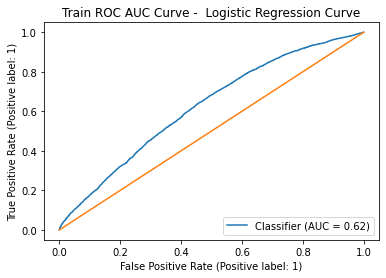

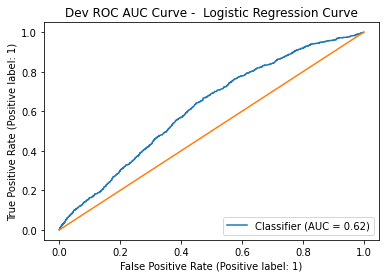

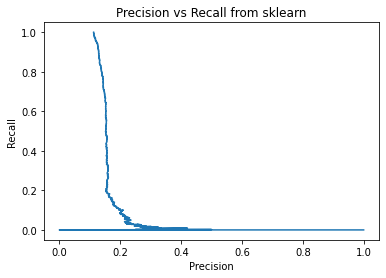

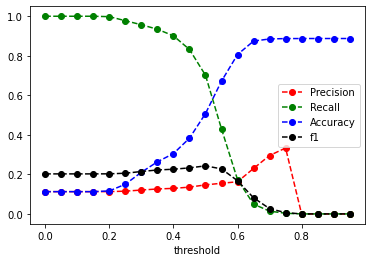

In [ ]:
#plot and get model metrics with balancing class weights
thresholds = np.arange(0, 1, .05)
LR_balanced_metricsDF = computeAndPlotMetrics(LR_simple_train_pred_balancedWeights,LR_simple_train_probs_balancedWeights,
                              LR_simple_dev_pred_balancedWeights,LR_simple_dev_probs_balancedWeights,
                                  y_dev,y_train,thresholds,'Logistic Regression')
LR_balanced_metricsDF

For the logistic regression a threshold of 0.1, would result in successfully predicting all the positives correctly - as this results in a recall around 0.85-0.9. But this means that the accuracy of the model is just 40 %. Logistic Regression gives the flexibility to choose the threshold. This is further evident by balancing the class weights of the model where for a threshold of 0.5 the recall is close to 0.7 and precision of around 0.2. All this means on the existing dataset without removing the Null values in the dataset the model predicts that a lot more of the participants accept the marketing campaigns than those that actually accept it.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### KNN classifier

In [ ]:
# colum tranformation for the only numerical column 'age'
# all other columns are already lable encoded

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

transformer_knn = make_column_transformer((StandardScaler(),['age']),                                       
                                          remainder = 'passthrough')
knn_pipe = Pipeline([('transform', transformer_knn), 
                     ('knn', KNeighborsClassifier(n_neighbors = 5))
                    ])
start = time.time()
knn_pipe.fit(X_train, y_train)
stop = time.time()
knn_fit_time = str(round(stop-start,2))+'s'

In [ ]:
knn_train_pred = knn_pipe.predict(X_train)
knn_dev_pred = knn_pipe.predict(X_dev)

train_knn_acc, train_knn_f1, train_knn_prec, train_knn_rec, train_knn_rocauc =\
computeModelMetrics(knn_train_pred, knn_train_pred, y_train)

dev_knn_acc, dev_knn_f1, dev_knn_prec, dev_knn_rec, dev_knn_rocauc = \
computeModelMetrics(knn_dev_pred, knn_dev_pred, y_dev)

knn_metrics_df = createMetricsDF(train_knn_acc,train_knn_f1,
                                      train_knn_prec,train_knn_rec,train_knn_rocauc,
                                      dev_knn_acc,dev_knn_f1,
                                      dev_knn_prec,dev_knn_rec,dev_knn_rocauc)
knn_metrics_df

,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.891715,0.210619,0.589109,0.128233,0.558439
1,development,0.881767,0.125673,0.376344,0.075431,0.529781


####Decision Tree classifier

In [ ]:
# Fit the Decision tree classifier

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

start = time.time()
DTree = DecisionTreeClassifier(min_samples_split=0.05, random_state=42,max_depth=5,class_weight='balanced').fit(X_train, y_train)
stop = time.time()
decision_tree_train = DTree.predict(X_train)
decision_tree_dev = DTree.predict(X_dev)

decision_tree_train_pred_prob = DTree.predict_proba(X_train)
decision_tree_dev_pred_prob = DTree.predict_proba(X_dev)

train_DTree_acc, train_DTree_f1, train_DTree_prec, train_DTree_rec, train_DTree_rocauc =\
computeModelMetrics(decision_tree_train, decision_tree_train_pred_prob[:,1], y_train)

dev_DTree_acc, dev_DTree_f1, dev_DTree_prec, dev_DTree_rec, dev_DTree_rocauc = \
computeModelMetrics(decision_tree_dev, decision_tree_dev_pred_prob[:,1], y_dev)

DTree_fit_time = str(round(stop-start,2))+'s'

DTree_metrics_df = createMetricsDF(train_DTree_acc, train_DTree_f1, train_DTree_prec, train_DTree_rec, train_DTree_rocauc,
                                      dev_DTree_acc, dev_DTree_f1, dev_DTree_prec, dev_DTree_rec, dev_DTree_rocauc)

DTree_metrics_df



,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.658907,0.261418,0.172881,0.53583,0.654409
1,development,0.657441,0.257368,0.170265,0.52694,0.652914


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.658907,0.261418,0.172881,0.53583,0.654409
1,development,0.657441,0.257368,0.170265,0.52694,0.652914


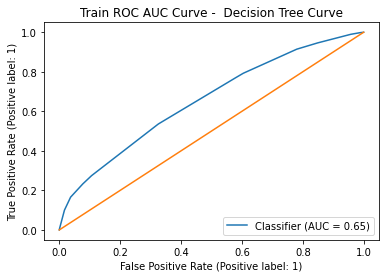

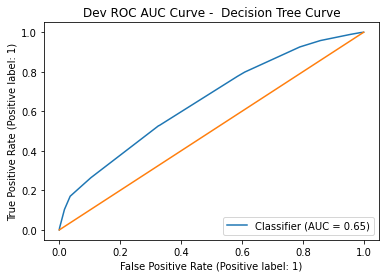

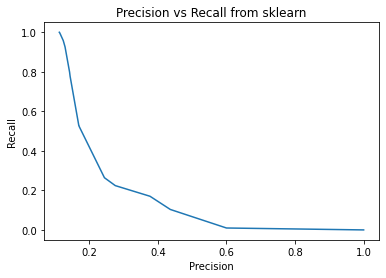

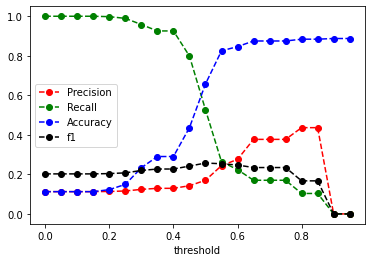

In [ ]:
#plot and get model metrics with balancing class weights
thresholds = np.arange(0, 1, .05)
DTree_metrics_df = computeAndPlotMetrics(decision_tree_train,decision_tree_train_pred_prob[:,1],
                              decision_tree_dev,decision_tree_dev_pred_prob[:,1],
                                  y_dev,y_train,thresholds,'Decision Tree')
DTree_metrics_df

#### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

start = time.time()
svc = SVC(class_weight='balanced').fit(X_train, y_train)
stop = time.time()
svc_train = svc.predict(X_train)
svc_dev = svc.predict(X_dev)


train_svc_acc, train_svc_f1, train_svc_prec, train_svc_rec, train_svc_rocauc =\
computeModelMetrics(svc_train, svc_train, y_train)

dev_svc_acc, dev_svc_f1, dev_svc_prec, dev_svc_rec, dev_svc_rocauc = \
computeModelMetrics(svc_dev, svc_dev, y_dev)

svc_fit_time = str(round(stop-start,2))+'s'

svc_metrics_df = createMetricsDF(train_svc_acc, train_svc_f1, train_svc_prec, train_svc_rec, train_svc_rocauc,
                                      dev_svc_acc, dev_svc_f1, dev_svc_prec, dev_svc_rec, dev_svc_rocauc)

svc_metrics_df

,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.635751,0.259319,0.168188,0.566002,0.605304
1,development,0.634620,0.260442,0.168682,0.571121,0.606901


So across all the models balancing for class weights seems to be helpful with the Decision Tree models giving the best roc auc score of 0.65-0.66 on the existing dataset. The next steps would be to eliminate the null values in the data set (unknown values) in the 7 columns and evaluate it on the best model till now.

In [ ]:
model_metrics = {'Model':['Logistic Regression','KNN','Decision Tree','Support Vector'],
                    'accuracy':[LR_balanced_metricsDF.loc[1,'accuracy'],knn_metrics_df.loc[1,'accuracy'],DTree_metrics_df.loc[1,'accuracy'],svc_metrics_df.loc[1,'accuracy']],
                    'F1 Score':[LR_balanced_metricsDF.loc[1,'f1 score'],knn_metrics_df.loc[1,'f1 score'],DTree_metrics_df.loc[1,'f1 score'],svc_metrics_df.loc[1,'f1 score']],
                    'precision':[LR_balanced_metricsDF.loc[1,'precision'],knn_metrics_df.loc[1,'precision'],DTree_metrics_df.loc[1,'precision'],svc_metrics_df.loc[1,'precision']],
                    'recall':[LR_balanced_metricsDF.loc[1,'recall'],knn_metrics_df.loc[1,'recall'],DTree_metrics_df.loc[1,'recall'],svc_metrics_df.loc[1,'recall']],
                    'roc auc score':[LR_balanced_metricsDF.loc[1,'roc auc score'],knn_metrics_df.loc[1,'roc auc score'],DTree_metrics_df.loc[1,'roc auc score'],svc_metrics_df.loc[1,'roc auc score']],
             'fit time':[LR_fit_time_balanced,knn_fit_time,DTree_fit_time,svc_fit_time]}
model_metrics_df = pd.DataFrame.from_dict(model_metrics)

In [ ]:
model_metrics_df

,Model,accuracy,F1 Score,precision,recall,roc auc score,fit time
0,Logistic Regression,0.507647,0.243001,0.146953,0.701509,0.617224,0.17s
1,KNN,0.881767,0.125673,0.376344,0.075431,0.529781,0.05s
2,Decision Tree,0.657441,0.257368,0.170265,0.526940,0.652914,0.03s
3,Support Vector,0.634620,0.260442,0.168682,0.571121,0.606901,55.01s


From the above metrics, it is evident that the support vector machine takes a long time to fit the model (more than a minute) for this data set. So as we increase the number of features, this model is likely to be more compute intensive. However the best model amongst all the four evaluated so far seems to be the Decision tree - as they have the fastest run time and also have the highest roc auc score.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- Using only balanced weights to account for imbalanced dataset in all the models. 
- More feature engineering and exploration. 
1. Including all the features, 
2. Dropping unknowns
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### DataFrame with all the features ####


We have conducted the analysis with the features containg only the bank client data. We can attempt to improvise the model's performance by including all the features and scoring the performance of the models.


#### Dataframe with unknowns removed ####
Once we have analyzed the given data with sub-features and all the features we can proceed to removing the unknowns i.e. observations where there are missing values and conduct the marketing campaign succcess prediction using our models and scoering their perfomrance. 

### Problem 12: Improving the model with all the features included

The following are the complete set of input variables for the data which would be used for analysis:

```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# label-encoding the features and creating a new data-frame with all the features

DF_all = df.drop(columns='duration')

columns = DF_all.columns.values
for icol in columns:
  le = preprocessing.LabelEncoder()
  if DF_all[icol].dtypes == object:
    DF_all.loc[:,icol] = le.fit_transform(DF_all[icol])



DF_all.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Train-split the dataframe with all features ####

In [ ]:
# train test split of data
X_all = DF_all.drop(columns = ['y'])
y_all = DF_all['y']
        
X_train_all, X_dev_all, y_train_all, y_dev_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y, shuffle=True)


#### Logistic regression ####

In [ ]:
#1.  Creating and fitting the model without balancing class weights
LR_all_train_probs_unbalanced, LR_all_train_pred_unbalanced, LR_all_dev_probs_unbalanced, LR_all_dev_pred_unbalanced,\
LR_all_unbalanced_fit_time = buildLogisticRegression(X_train_all, y_train_all, X_dev_all, y_dev_all, False)

(8238,)
(8238,)
(8238, 19)
[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.899393,0.309806,0.681943,0.200431,0.766215
1,development,0.900583,0.298201,0.728033,0.187500,0.779104


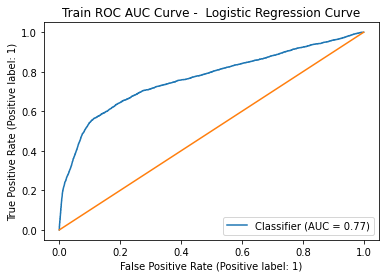

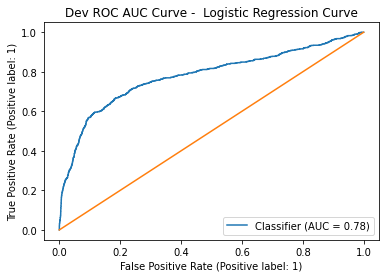

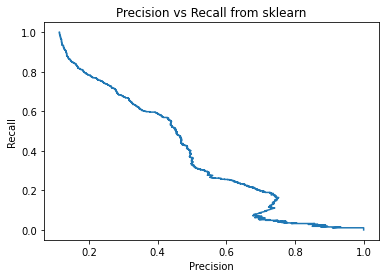

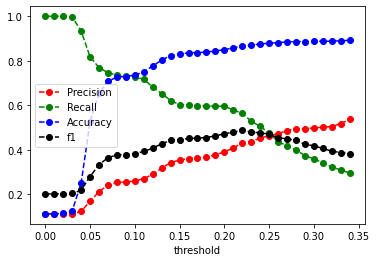

In [ ]:
# Computing and plotting the metrics

thresholds = np.arange(0, 0.35, .01)
LR_all_unbalanced_metricsDF = computeAndPlotMetrics(LR_all_train_pred_unbalanced,LR_all_train_probs_unbalanced,
                              LR_all_dev_pred_unbalanced,LR_all_dev_probs_unbalanced,
                                  y_dev_all,y_train_all,thresholds,'Logistic Regression')
LR_all_unbalanced_metricsDF

In [ ]:
#2.  Creating and fitting the model by balancing class weights
LR_all_train_probs_balanced, LR_all_train_pred_balanced, LR_all_dev_probs_balanced, LR_all_dev_pred_balanced,\
LR_all_balanced_fit_time = buildLogisticRegression(X_train_all, y_train_all, X_dev_all, y_dev_all, True)


(8238,)
(8238,)
(8238, 19)
[0. 1. 1. ... 1. 0. 1.]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.728498,0.366969,0.248848,0.698545,0.766811
1,development,0.738286,0.385755,0.262200,0.729526,0.779171


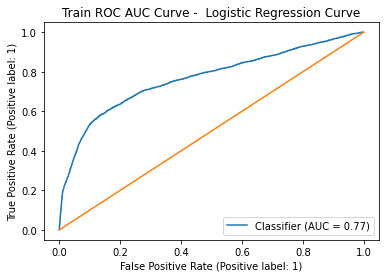

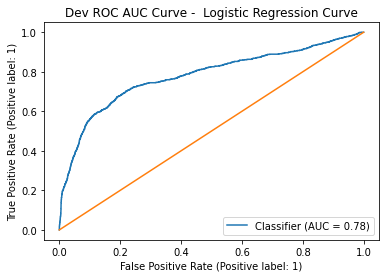

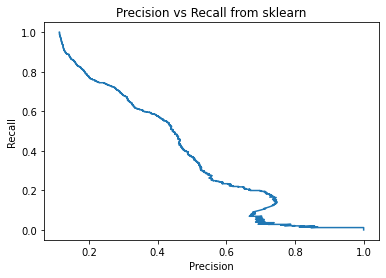

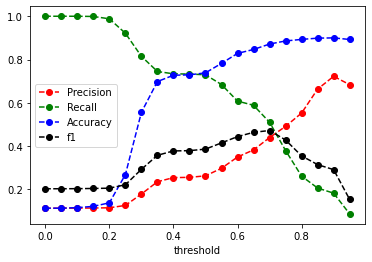

In [ ]:
# Computing and plotting the metrics

thresholds = np.arange(0, 1, .05)
LR_all_balanced_metricsDF = computeAndPlotMetrics(LR_all_train_pred_balanced,LR_all_train_probs_balanced,
                              LR_all_dev_pred_balanced,LR_all_dev_probs_balanced,
                                  y_dev_all,y_train_all,thresholds,'Logistic Regression')
LR_all_balanced_metricsDF

When adding all the remaining features, we find the roc auc score of close to 0.92 on the Logistic Regression. Also the accuracy on both the training/development datasets is around 84%. Also we get a high recall of 0.87. This means that the model is able to predict a high proportion of the positive classes correctly. This is significantly better than the logistic regression model with just the subset of the features.

#### Decision Tree Model ####

In [ ]:
# creating and fitting the model with balanced weights

start = time.time()
DTree_all = DecisionTreeClassifier(min_samples_split=0.05, random_state=42,max_depth=5,class_weight='balanced').fit(X_train_all, y_train_all)
stop = time.time()
decision_tree_train_all = DTree_all.predict(X_train_all)
decision_tree_dev_all = DTree_all.predict(X_dev_all)

decision_tree_train_pred_prob_all = DTree_all.predict_proba(X_train_all)
decision_tree_dev_pred_prob_all = DTree_all.predict_proba(X_dev_all)

train_DTree_acc_all, train_DTree_f1_all, train_DTree_prec_all, train_DTree_rec_all, train_DTree_rocauc_all =\
computeModelMetrics(decision_tree_train_all, decision_tree_train_pred_prob_all[:,1], y_train_all)

dev_DTree_acc_all, dev_DTree_f1_all, dev_DTree_prec_all, dev_DTree_rec_all, dev_DTree_rocauc_all = \
computeModelMetrics(decision_tree_dev_all, decision_tree_dev_pred_prob_all[:,1], y_dev_all)

DTree_fit_time_all = str(round(stop-start,2))+'s'

DTree_metrics_all_df = createMetricsDF(train_DTree_acc_all, train_DTree_f1_all, train_DTree_prec_all, train_DTree_rec_all, train_DTree_rocauc_all,
                                      dev_DTree_acc_all, dev_DTree_f1_all, dev_DTree_prec_all, dev_DTree_rec_all, dev_DTree_rocauc_all)

DTree_metrics_all_df

,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.834841,0.451964,0.360888,0.604526,0.783897
1,development,0.838432,0.463523,0.370251,0.619612,0.795098


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


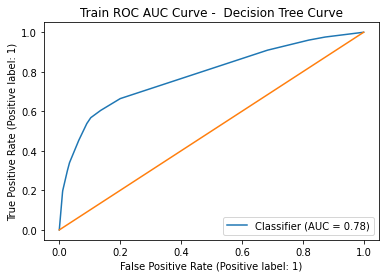

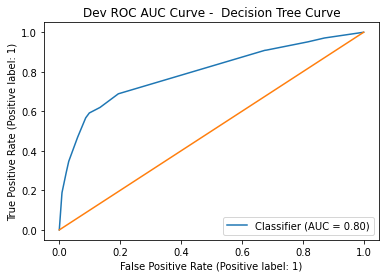

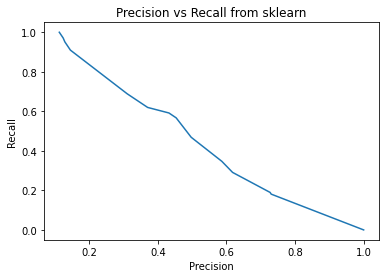

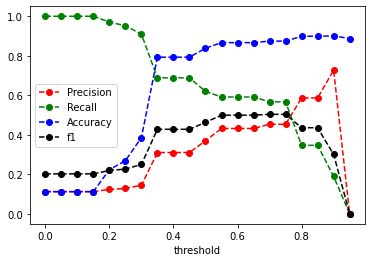

In [92]:
# Plotting the results of Decision tree models
thresholds = np.arange(0, 1, .05)
DTree_metrics_all_df = computeAndPlotMetrics(decision_tree_train_all,decision_tree_train_pred_prob_all[:,1],
                              decision_tree_dev_all,decision_tree_dev_pred_prob_all[:,1],
                                  y_dev_all,y_train_all,thresholds,'Decision Tree')

#### Comparison of metrics of the two models

In [ ]:
model_all_metrics = {'Model':['Logistic Regression','Decision Tree'],
                    'accuracy':[LR_all_balanced_metricsDF.loc[1,'accuracy'],DTree_metrics_all_df.loc[1,'accuracy']],
                    'F1 Score':[LR_all_balanced_metricsDF.loc[1,'f1 score'],DTree_metrics_all_df.loc[1,'f1 score']],
                    'precision':[LR_all_balanced_metricsDF.loc[1,'precision'],DTree_metrics_all_df.loc[1,'precision']],
                    'recall':[LR_all_balanced_metricsDF.loc[1,'recall'],DTree_metrics_all_df.loc[1,'recall']],
                    'roc auc score':[LR_all_balanced_metricsDF.loc[1,'roc auc score'],DTree_metrics_all_df.loc[1,'roc auc score']],
             'fit time':[LR_all_balanced_fit_time,DTree_fit_time_all]}
model_all_metrics_df = pd.DataFrame.from_dict(model_all_metrics)

In [ ]:
model_all_metrics_df

,Model,accuracy,F1 Score,precision,recall,roc auc score,fit time
0,Logistic Regression,0.738286,0.385755,0.262200,0.729526,0.779171,0.5s
1,Decision Tree,0.838432,0.463523,0.370251,0.619612,0.795098,0.1s


We now picked the two best models from the subset features (Logistic regression and decision trees) and trained them on all the features. We get roc auc score of around 0.79 and we are able to get around 62% of our positives (successful marketing campaigns) predicted correctly when using decision trees. However using the logistic regression, we were able to predict 73% of the positives correctly. 

Since we evaluate the model based on the F1 score and the roc auc score, the decision tree based model performs better than logistic regression on both these metrics.

Both the logistic regression model/decision tree model have fit time of the order of less than ~1 seconds and in the case of the decision tree it is a fraction of a second.

So we have a case for further optimizing the Decision tree models.

However adding the duration feature in to the dataframe, improves the roc auc score to 0.9 and we were able to predict more than 90% of the positives in the outcome. As mentioned in the EDA, duration cannot be determined pre-facto, diminishing any of it's practical value for predicting the target class before the campaign.



### Problem 13: Improving the model by dropping unknown values in the dataframe with all features

In [ ]:
# dataframe creation for all features dropping duration column

DF_no_null = df.drop(columns='duration')

subsetCols = ['age','job','marital','education','default','housing','loan','y']

# dropping unknown values from the DF_no_null c
for i_col in subsetCols:
  DF_no_null = DF_no_null.loc[(DF_no_null[i_col]!='unknown')] # instead of doing loc on DF_no_null
                                                              # do in DF_all?

columns = DF_no_null.columns.values
for icol in columns:
  le = preprocessing.LabelEncoder()
  if DF_no_null[icol].dtypes == object:
    DF_no_null.loc[:,icol] = le.fit_transform(DF_all[icol])

DF_no_null.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Train-test Split the dataframe after removing observation with unknowns

In [ ]:
X_noNull = DF_no_null.drop(columns = ['y'])
y_noNull = DF_no_null['y']
        
X_train_noNull, X_dev_noNull, y_train_noNull, y_dev_noNull = train_test_split(X_noNull, y_noNull, test_size=0.2, random_state=42, stratify=y, shuffle=True)

y_baseline_train_noNull = np.zeros(len(y_train_noNull))
y_baseline_dev_noNull = np.zeros(len(y_dev_noNull))

train_baseline_acc_noNull,train_baseline_f1_noNull,train_baseline_prec_noNull,train_baseline_rec_noNull,train_baseline_rocauc_noNull = \
computeModelMetrics(y_baseline_train_noNull,y_baseline_train_noNull,y_train_noNull)

dev_baseline_acc_noNull,dev_baseline_f1_noNull,dev_baseline_prec_noNull,dev_baseline_rec_noNull,dev_baseline_rocauc_noNull = \
computeModelMetrics(y_baseline_dev_noNull,y_baseline_dev_noNull,y_dev)

baseline_metrics_df_noNull = createMetricsDF(train_baseline_acc_noNull,train_baseline_f1_noNull,
                                      train_baseline_prec_noNull,train_baseline_rec_noNull,train_baseline_rocauc_noNull,
                                      dev_baseline_acc_noNull,dev_baseline_f1_noNull,
                                      dev_baseline_prec_noNull,dev_baseline_rec_noNull,dev_baseline_rocauc_noNull)
baseline_metrics_df_noNull

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.887344,0.0,0.0,0.0,0.5
1,development,0.887351,0.0,0.0,0.0,0.5


#### Logistic regression

In [ ]:
LR_train_probs_noNull_unbalancedWeights, LR_train_pred_noNull_unbalancedWeights, LR_dev_probs_noNull_unbalancedWeights,\
LR_dev_pred_noNull_unbalancedWeights,LR_noNull_fit_time_unbalanced = buildLogisticRegression(X_train_noNull,y_train_noNull,X_dev_noNull,y_dev_noNull,False)

# Build logistic regression model with balancing the class weights
LR_train_probs_noNull_balancedWeights,LR_train_pred_noNull_balancedWeights,LR_dev_probs_noNull_balancedWeights,\
LR_dev_pred_noNull_balancedWeights,LR_noNull_fit_time_balanced = buildLogisticRegression(X_train_noNull,y_train_noNull,X_dev_noNull,y_dev_noNull,True)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(8238,)
(8238,)
(8238, 19)
[0. 0. 0. ... 0. 0. 0.]
(8238,)
(8238,)
(8238, 19)
[0. 1. 1. ... 1. 0. 1.]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.899393,0.309806,0.681943,0.200431,0.766215
1,development,0.900583,0.298201,0.728033,0.187500,0.779104


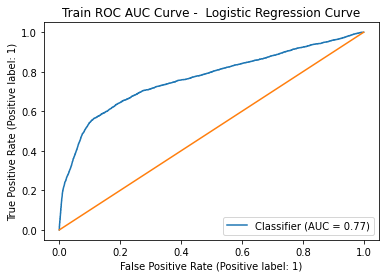

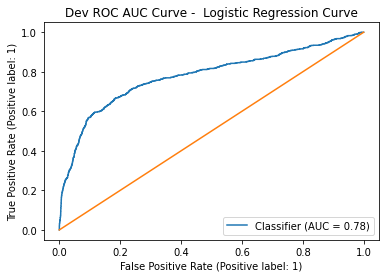

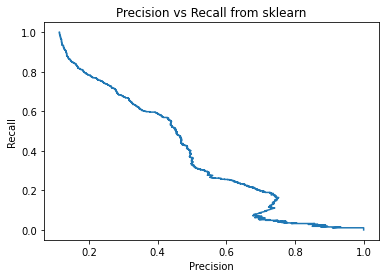

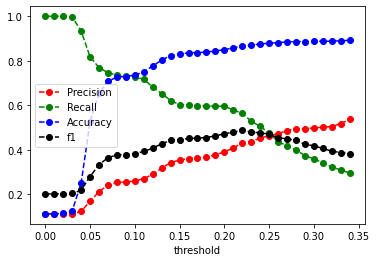

In [ ]:
#plot and get model metrics without balancing class weights
thresholds = np.arange(0, 0.35, .01)
LR_unbalanced_noNull_metrics_df = computeAndPlotMetrics(LR_train_pred_noNull_unbalancedWeights,LR_train_probs_noNull_unbalancedWeights,
                              LR_dev_pred_noNull_unbalancedWeights,LR_dev_probs_noNull_unbalancedWeights,
                                  y_dev_noNull,y_train_noNull,thresholds,'Logistic Regression')
LR_unbalanced_noNull_metrics_df

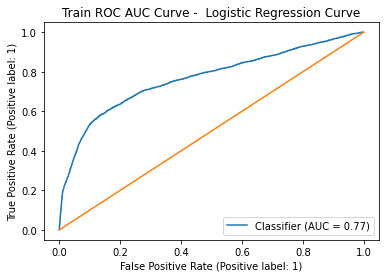

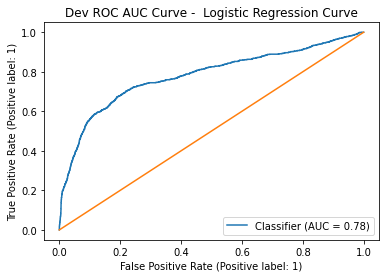

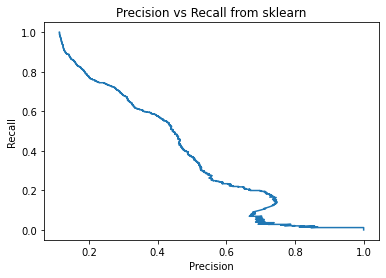

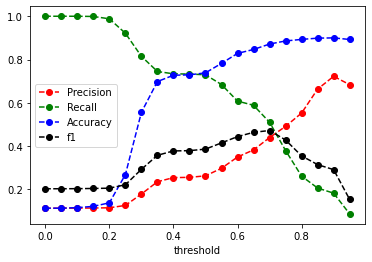

In [ ]:
#plot and get model metrics with balancing class weights
thresholds = np.arange(0, 1, .05)
LR_balanced_noNull_metrics_df = computeAndPlotMetrics(LR_train_pred_noNull_balancedWeights,LR_train_probs_noNull_balancedWeights,
                              LR_dev_pred_noNull_balancedWeights,LR_dev_probs_noNull_balancedWeights,
                                  y_dev,y_train,thresholds,'Logistic Regression')

Dropping the rows of data which had unknown values decreases the roc auc score and also the model accuracy ever so slightly. So dropping the unknown values might not be a way forward. We can try imputing the data.

In [ ]:
LR_balanced_noNull_metrics_df

,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.728498,0.366969,0.248848,0.698545,0.766811
1,development,0.738286,0.385755,0.262200,0.729526,0.779171


#### Decision Tree model

In [ ]:
start = time.time()
DTree_all_noNull = DecisionTreeClassifier(min_samples_split=0.05, random_state=42,max_depth=5,class_weight='balanced').fit(X_train_noNull,y_train_noNull)
stop = time.time()
decision_tree_train_all_noNull = DTree_all.predict(X_train_noNull)
decision_tree_dev_all_noNull = DTree_all.predict(X_dev_noNull)

decision_tree_train_pred_prob_all_noNull = DTree_all.predict_proba(X_train_noNull)
decision_tree_dev_pred_prob_all_noNull = DTree_all.predict_proba(X_dev_noNull)

train_DTree_acc_all_noNull, train_DTree_f1_all_noNull, train_DTree_prec_all_noNull, train_DTree_rec_all_noNull, train_DTree_rocauc_all_noNull =\
computeModelMetrics(decision_tree_train_all_noNull, decision_tree_train_pred_prob_all_noNull[:,1], y_train_noNull)

dev_DTree_acc_all_noNull, dev_DTree_f1_all_noNull, dev_DTree_prec_all_noNull, dev_DTree_rec_all_noNull, dev_DTree_rocauc_all_noNull = \
computeModelMetrics(decision_tree_dev_all_noNull, decision_tree_dev_pred_prob_all_noNull[:,1], y_dev_noNull)

DTree_fit_time_all_noNull = str(round(stop-start,2))+'s'

DTree_metrics_all_noNull_df = createMetricsDF(train_DTree_acc_all_noNull, train_DTree_f1_all_noNull, train_DTree_prec_all_noNull, train_DTree_rec_all_noNull, train_DTree_rocauc_all_noNull,
                                      dev_DTree_acc_all_noNull, dev_DTree_f1_all_noNull, dev_DTree_prec_all_noNull, dev_DTree_rec_all_noNull, dev_DTree_rocauc_all_noNull)

DTree_metrics_all_noNull_df

,Dataset Type,accuracy,f1 score,precision,recall,roc auc score
0,training,0.834841,0.451964,0.360888,0.604526,0.783897
1,development,0.838432,0.463523,0.370251,0.619612,0.795098


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


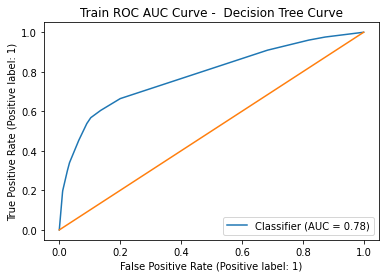

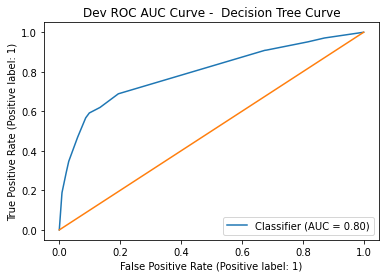

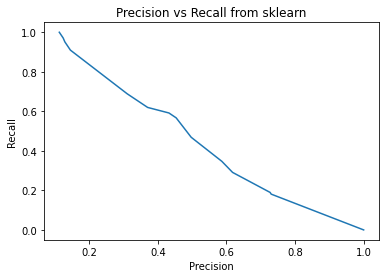

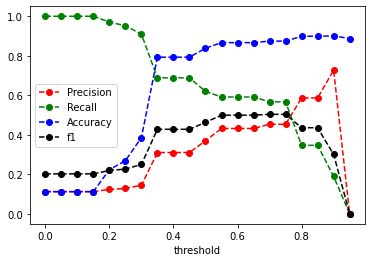

In [93]:
# Plotting the results of Decision tree models
thresholds = np.arange(0, 1, .05)
DTree_metrics_all_noNull_df = computeAndPlotMetrics(decision_tree_train_all_noNull,decision_tree_train_pred_prob_all_noNull[:,1],
                              decision_tree_dev_all_noNull,decision_tree_dev_pred_prob_all_noNull[:,1],
                                  y_dev_noNull,y_train_noNull,thresholds,'Decision Tree')

#### Comparison of metrics of the two models

In [ ]:
model_all_metrics_noNull = {'Model':['Logistic Regression','Decision Tree'],
                    'accuracy':[LR_balanced_noNull_metrics_df.loc[1,'accuracy'],DTree_metrics_all_noNull_df.loc[1,'accuracy']],
                    'F1 Score':[LR_balanced_noNull_metrics_df.loc[1,'f1 score'],DTree_metrics_all_noNull_df.loc[1,'f1 score']],
                    'precision':[LR_balanced_noNull_metrics_df.loc[1,'precision'],DTree_metrics_all_noNull_df.loc[1,'precision']],
                    'recall':[LR_balanced_noNull_metrics_df.loc[1,'recall'],DTree_metrics_all_noNull_df.loc[1,'recall']],
                    'roc auc score':[LR_balanced_noNull_metrics_df.loc[1,'roc auc score'],DTree_metrics_all_noNull_df.loc[1,'roc auc score']],
             'fit time':[LR_all_balanced_fit_time,DTree_fit_time_all]}
model_all_noNull_metrics_df = pd.DataFrame.from_dict(model_all_metrics_noNull)

In [ ]:
model_all_noNull_metrics_df

,Model,accuracy,F1 Score,precision,recall,roc auc score,fit time
0,Logistic Regression,0.738286,0.385755,0.262200,0.729526,0.779171,0.5s
1,Decision Tree,0.838432,0.463523,0.370251,0.619612,0.795098,0.1s


## Problem 14: Results

Among the varius models evaluated we found that **Logistic regression and Decision tree** were models that could be used for this dataset due to their ability to adjust their thresholds and also being computationally efficient (refer Problem 10, model_metrics_df).

We also find that **using all the features (without removing unknowns)** except for 'duration' with **balancing weights parameter** (which helps in adjusting weights for the classes such that it accounts for the imbalance in the data) gives us the combination of highest F1 score, ROC-AUC score and recall. 

Even though we use only F1 score and ROC-AUC as metric for evaluating and comparing models, using recall as metric is useful for selcting models when the F1 and ROC-AUC scores are close. This is because recal represents the models ability to predict the positive class (i.e. customers who would accept the marketing campaign) correctly.

The logistic regression model built and trained using above mentioned methods resulted in 0.38 and 0.78 F1 score and ROC-AUC score respectively. Our **best performimg** model, **Decision tree** model trained the same way as the mentioned Logistic regression model was evaluated to a F1 score and ROC-AUC score of 0.46 and 0.80 respectively. 

Decision tree model(0.1 secs), however is able to predict with higher value of the metrics at nearly 1/5th of the time as the Logistic regressin model(0.5 secs) and is an attractive choice for conducting analysis with fine tuning like hyper-parameter optimization and for scaling up. 

 

## Problem 15: Next Steps and Recommendations

We can further improve our model's predictive ability through choosing the best performing model for hyper-parameter tuning and/or utilizing kernal tricks for logstic regression and decision tree models. We can use feature engineering to categorize columns like 'pdays' to categorize their unique values than being a numerical feature to see if that improves the model performance. 

We can also use Neural-networks and deep learning models to evalaute their performance against decision tree and logistic regression model we built. 

## References ###


1. Moro, Sérgio & Cortez, Paulo & Laureano, Raul. (2011). Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. Proceedings of the European Simulation and Modelling Conference. 
2. Moro, Sérgio & Cortez, Paulo & Rita, Paulo. (2014). A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems. 62. 10.1016/j.dss.2014.03.001. 


##### Questions